California Housing dataset next. This is a regression problem, where the goal is to predict house value based on several features like income, location, etc.

Linear Regression

Polynomial Regression

Locally Weighted Regression (LWR)

PCA (for dimensionality reduction/analysis — optional)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score


Load & Preprocess Data

In [2]:
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# DataFrame view (optional)
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
print(df.head())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


PCA (Optional for Visualization/Feature Reduction)

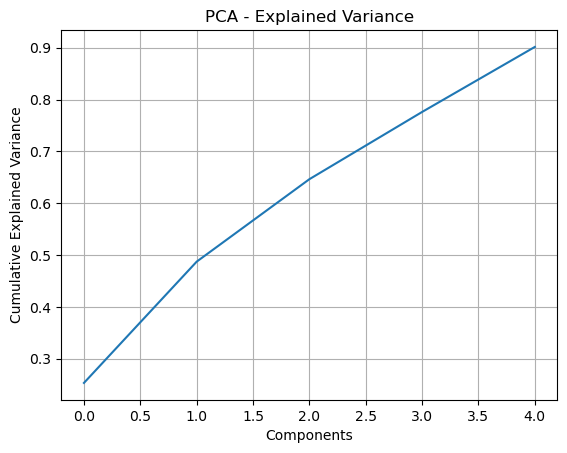

In [3]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA - Explained Variance")
plt.xlabel("Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


Linear Regression

In [4]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R²: 0.575787706032451
MSE: 0.5558915986952442


Polynomial Regression

In [5]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)

print("Polynomial Regression R²:", r2_score(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression R²: 0.64568197292619
MSE: 0.4643015238301228


Locally Weighted Regression (LWR)

In [8]:
def lwr(x0, X, y, tau):
    m = X.shape[0]
    weights = np.exp(-np.sum((X - x0)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)
    theta = np.linalg.pinv(X.T @ W @ X) @ (X.T @ W @ y)
    return x0 @ theta

# Add bias term
X_train_lwr = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_lwr = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]


sample_size = 500
y_pred_lwr = np.array([lwr(x0, X_train_lwr, y_train, tau=0.3) for x0 in X_test_lwr[:sample_size]])

print("LWR Sampled R²:", r2_score(y_test[:sample_size], y_pred_lwr))
print("MSE:", mean_squared_error(y_test[:sample_size], y_pred_lwr))


LWR Sampled R²: 0.7628527270524739
MSE: 0.32166112090812793


In [7]:
# Try a range of tau values and choose the one with lowest error
for tau in [0.1, 0.3, 0.5, 1.0, 5.0]:
    y_pred_lwr = np.array([lwr(x0, X_train_lwr, y_train, tau=tau) for x0 in X_test_lwr[:sample_size]])
    print(f"tau = {tau}")
    print("R²:", r2_score(y_test[:sample_size], y_pred_lwr))
    print("MSE:", mean_squared_error(y_test[:sample_size], y_pred_lwr))
    print("-" * 30)


tau = 0.1
R²: 0.34591194147505033
MSE: 0.7489408488298512
------------------------------
tau = 0.3
R²: 0.7612297771227154
MSE: 0.2733955635886069
------------------------------
tau = 0.5
R²: 0.7580003991068556
MSE: 0.2770932508967115
------------------------------
tau = 1.0
R²: 0.731687480099208
MSE: 0.307221946322248
------------------------------
tau = 5.0
R²: 0.6763685333741037
MSE: 0.37056298790937636
------------------------------
